In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
 
import os
import random
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
 
%matplotlib inline

In [2]:
###Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(xx_train, yy_train), (xx_test, yy_test) = mnist.load_data()

In [3]:
###Printing the shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print()
print()
print(xx_train.shape, yy_train.shape)
print(xx_test.shape, yy_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
#Without Normalization for this data

xx_train, xx_test = xx_train.reshape(-1, 28,28,1), xx_test.reshape(-1, 28,28,1)

In [5]:
###Making the model for this dataset
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),

    layers.Conv2D(filters=256, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 256)       6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                204864    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [6]:
###For loss function 'adam'
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [7]:
h11 = model.fit(x=xx_train, y=yy_train, epochs=5, batch_size=256, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 214s 1s/step - loss: 1.5738 - accuracy: 0.8678 - val_loss: 0.0981 - val_accuracy: 0.9695
Epoch 2/5
188/188 [==============================] - 213s 1s/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.0690 - val_accuracy: 0.9798
Epoch 3/5
188/188 [==============================] - 213s 1s/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0587 - val_accuracy: 0.9832
Epoch 4/5
188/188 [==============================] - 214s 1s/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0573 - val_accuracy: 0.9846
Epoch 5/5
188/188 [==============================] - 213s 1s/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0507 - val_accuracy: 0.9860


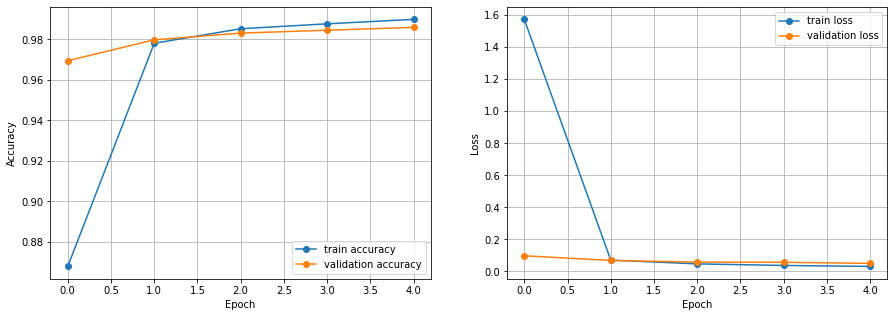

In [8]:
###Plotting graph for loss function 'adam'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h11.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h11.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h11.history['loss'], 'o-', label='train loss')
plt.plot(h11.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [9]:
333.###Predcting accrucy for 'adam'
test_loss1, test_acc1 = model.evaluate(xx_test, yy_test)
print('\nTest Accuracy:', test_acc1)
print('\nTest Loss:', test_loss1)


313/313 [==============================] - 11s 37ms/step - loss: 0.0394 - accuracy: 0.9889

Test Accuracy: 0.9889000058174133

Test Loss: 0.039372872561216354


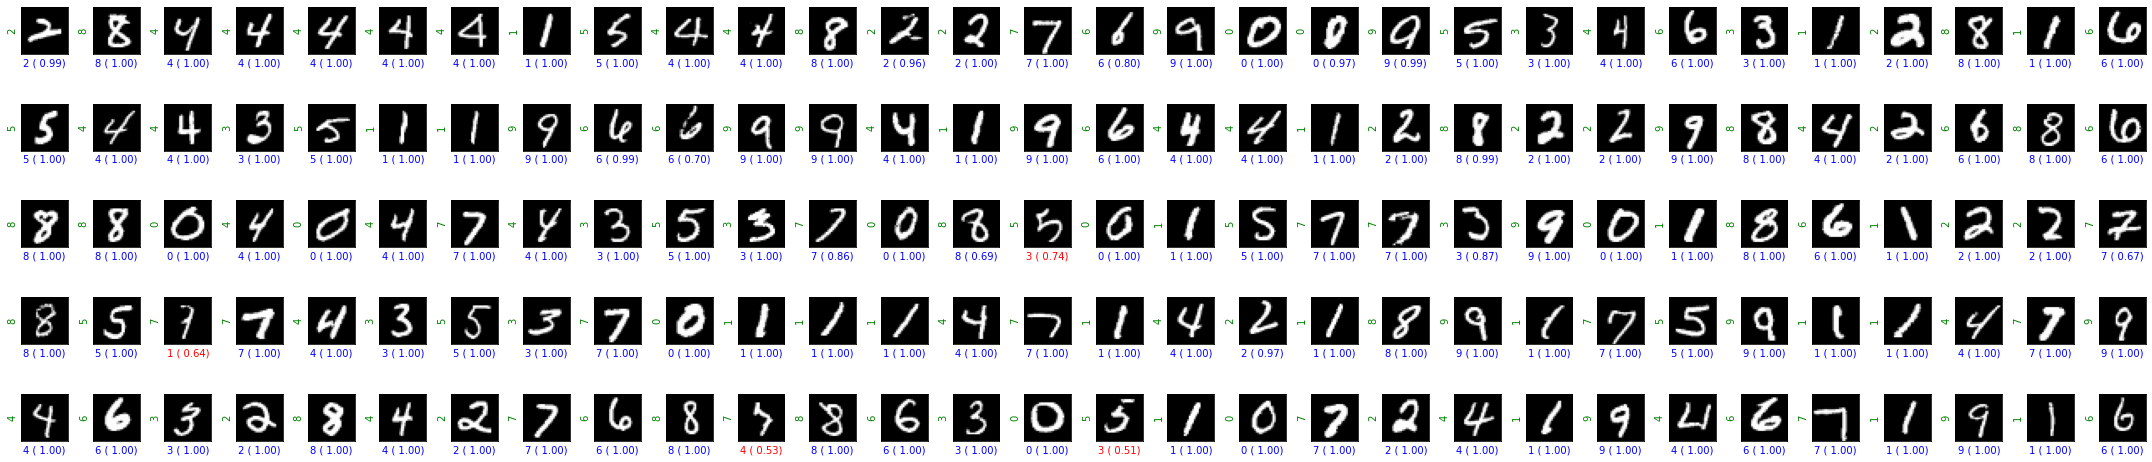

In [10]:
###Predicting Images for loss function 'adam'

ROWS = 5
COLS = 30

random_indices = random.sample(range(xx_test.shape[0]), ROWS*COLS)
sample_images = xx_test[random_indices, :]
sample_labels = yy_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [11]:
###For loss function  'sgd'

model.compile(
    optimizer='SGD', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h22 = model.fit(x=xx_train, y=yy_train, epochs=5, batch_size=256, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 214s 1s/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0429 - val_accuracy: 0.9887
Epoch 2/5
188/188 [==============================] - 213s 1s/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0435 - val_accuracy: 0.9888
Epoch 3/5
188/188 [==============================] - 214s 1s/step - loss: 0.0101 - accuracy: 0.9970 - val_loss: 0.0457 - val_accuracy: 0.9888
Epoch 4/5
188/188 [==============================] - 214s 1s/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0473 - val_accuracy: 0.9887
Epoch 5/5
188/188 [==============================] - 214s 1s/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0473 - val_accuracy: 0.9885


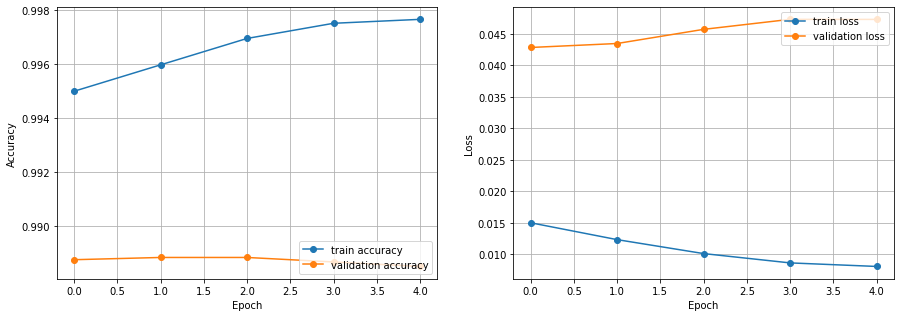

In [13]:
###Plotting graph for loss function 'sgd'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h22.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h22.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h22.history['loss'], 'o-', label='train loss')
plt.plot(h22.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [14]:
###Predcting accrucy for 'sgd'
test_loss2, test_acc2 = model.evaluate(xx_test, yy_test)
print('\nTest Accuracy:', test_acc2)
print('\nTest Loss:', test_loss2)

313/313 [==============================] - 11s 37ms/step - loss: 0.0322 - accuracy: 0.9903

Test Accuracy: 0.9902999997138977

Test Loss: 0.032215461134910583


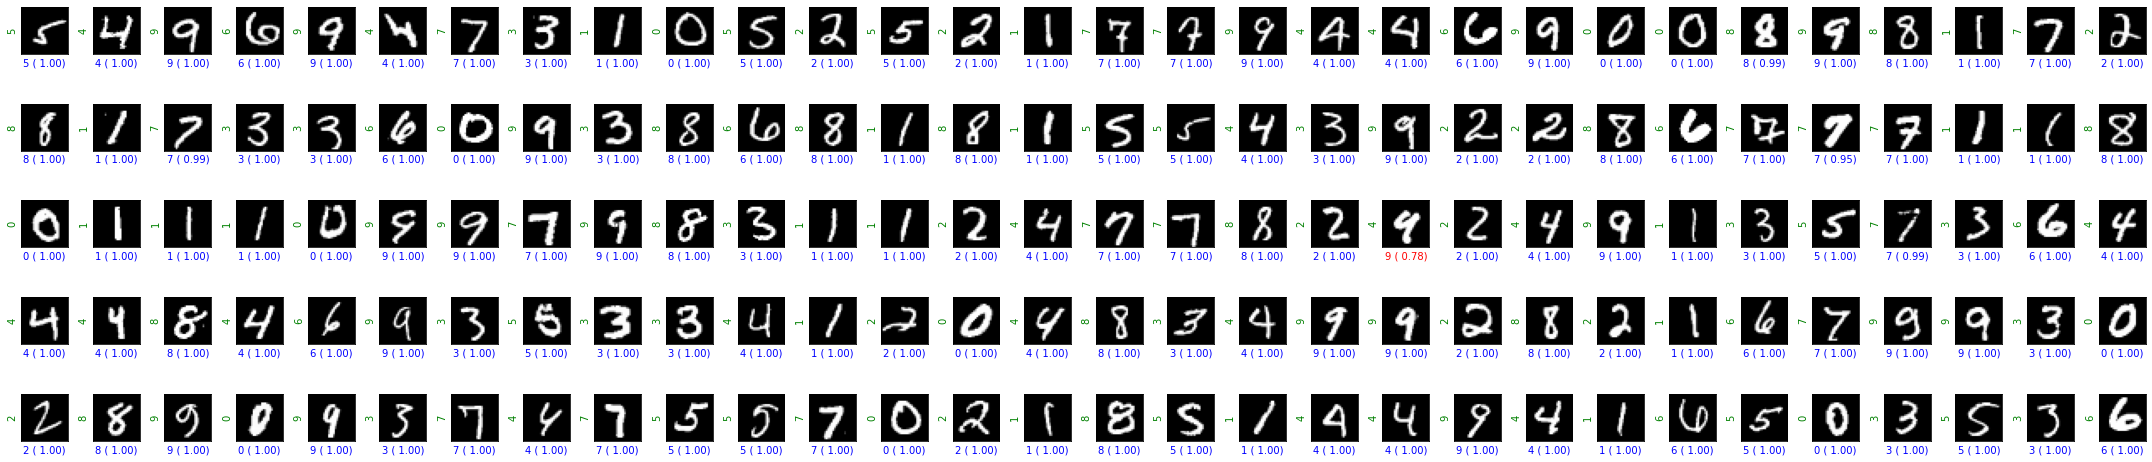

In [15]:
###Predicting Images for loss function 'sgd'

ROWS = 5
COLS = 30

random_indices = random.sample(range(xx_test.shape[0]), ROWS*COLS)
sample_images = xx_test[random_indices, :]
sample_labels = yy_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()

In [19]:
###For loss function 'RMSProp'
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [20]:
h33 = model.fit(x=xx_train, y=yy_train, epochs=5, batch_size=256, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 215s 1s/step - loss: 0.1494 - accuracy: 0.9723 - val_loss: 0.0620 - val_accuracy: 0.9833
Epoch 2/5
188/188 [==============================] - 215s 1s/step - loss: 0.0469 - accuracy: 0.9859 - val_loss: 0.0599 - val_accuracy: 0.9854
Epoch 3/5
188/188 [==============================] - 214s 1s/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.0693 - val_accuracy: 0.9812
Epoch 4/5
188/188 [==============================] - 215s 1s/step - loss: 0.0338 - accuracy: 0.9900 - val_loss: 0.0476 - val_accuracy: 0.9883
Epoch 5/5
188/188 [==============================] - 214s 1s/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0697 - val_accuracy: 0.9863


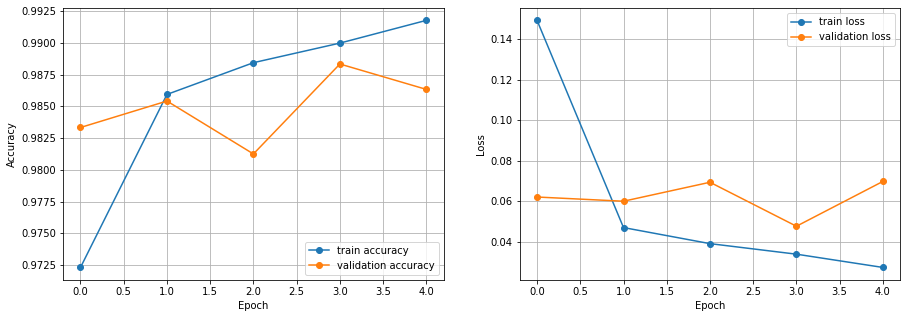

In [22]:
###Plotting graph for loss function 'RMSProp'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h33.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h33.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h33.history['loss'], 'o-', label='train loss')
plt.plot(h33.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [23]:
###Predcting accrucy for 'RMSProp'
test_loss3, test_acc3 = model.evaluate(xx_test, yy_test)
print('\nTest Accuracy:', test_acc3)
print('\nTest Loss:', test_loss3)

313/313 [==============================] - 12s 37ms/step - loss: 0.0571 - accuracy: 0.9882

Test Accuracy: 0.9882000088691711

Test Loss: 0.05709363892674446


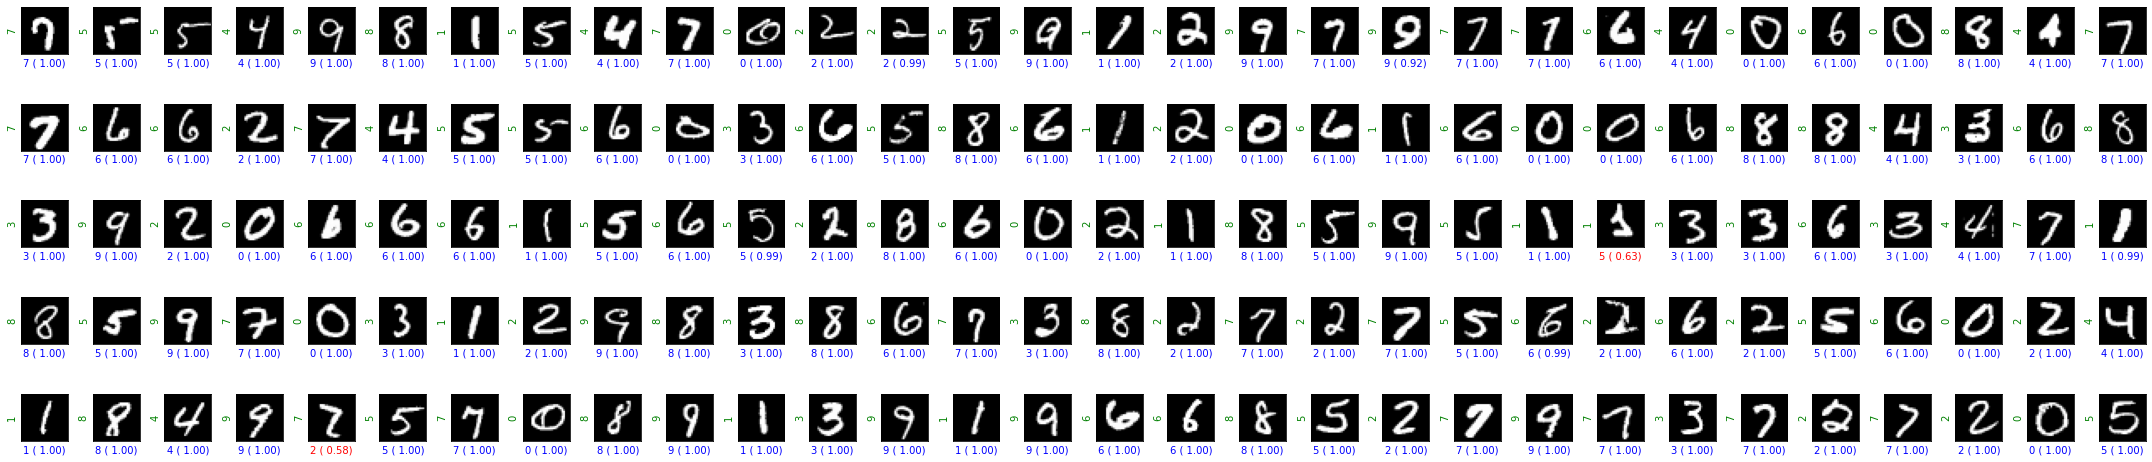

In [24]:
###Predicting Images for loss function 'RMSProp'
ROWS = 5
COLS = 30

random_indices = random.sample(range(xx_test.shape[0]), ROWS*COLS)
sample_images = xx_test[random_indices, :]
sample_labels = yy_test[random_indices]
predictions = model.predict(sample_images)

i = 0

plt.figure(figsize=(30,7))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28,28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])
        prediction = np.argmax(predictions[i]) 
        confidence = predictions[i][prediction]
        if sample_labels[i] == prediction:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='b')
        else:
            plt.xlabel(f"{prediction} ({confidence: .2f})", color='r')
        plt.ylabel(sample_labels[i], color='g')
        i += 1
        
plt.tight_layout()
plt.show()